# Notebook for taking virtual images (npz) and adjusting b/c

### by Austin Houston, Oct 2025

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AustinHouston/HAADF_ImSim/blob/main/image_editor_np.ipynb)



In [ ]:
# run this code cell first
!pip install ipympl
!git clone https://github.com/AustinHouston/pyTEMlib.git # for the dependencies
!git clone https://github.com/AustinHouston/HAADF_ImSim.git # for the files

# when it's done, restart the kernel (Runtime -> Restart Session)
# then run the cell below

In [1]:
import os
import numpy as np
from scipy.ndimage import rotate, zoom
import matplotlib.pyplot as plt

# google drive related
if 'google.colab' in sys.modules:
    %matplotlib widget
    from google.colab import output, drive
    output.enable_custom_widget_manager()
    drive.mount("/content/drive")

# this cell will have you log in to google drive (make sure you log into the same account you're using to run the notebook)
# click the folder icon on the left sidebar to see your drive files
# you should now see a folder called HAADF_ImSim
# this is whereall the image files are

In [14]:
path = './HAADF_ImSim/virtual_images/'

files = os.listdir(path)
files = [f for f in files if f.endswith('.npz')]
files.sort()
files

['Loop_100_-x_y.npz_virtual_images.npz',
 'Loop_100_0x_y.npz_virtual_images.npz',
 'Loop_100_x_-y.npz_virtual_images.npz',
 'Loop_100_x_0y.npz_virtual_images.npz',
 'Loop_100_x_y.npz_virtual_images.npz',
 'Loop_111_-x_y.npz_virtual_images.npz',
 'Loop_111_0x_y.npz_virtual_images.npz',
 'Loop_111_x_-y.npz_virtual_images.npz',
 'Loop_111_x_0y.npz_virtual_images.npz',
 'Loop_111_x_y.npz_virtual_images.npz']

### For all images at once

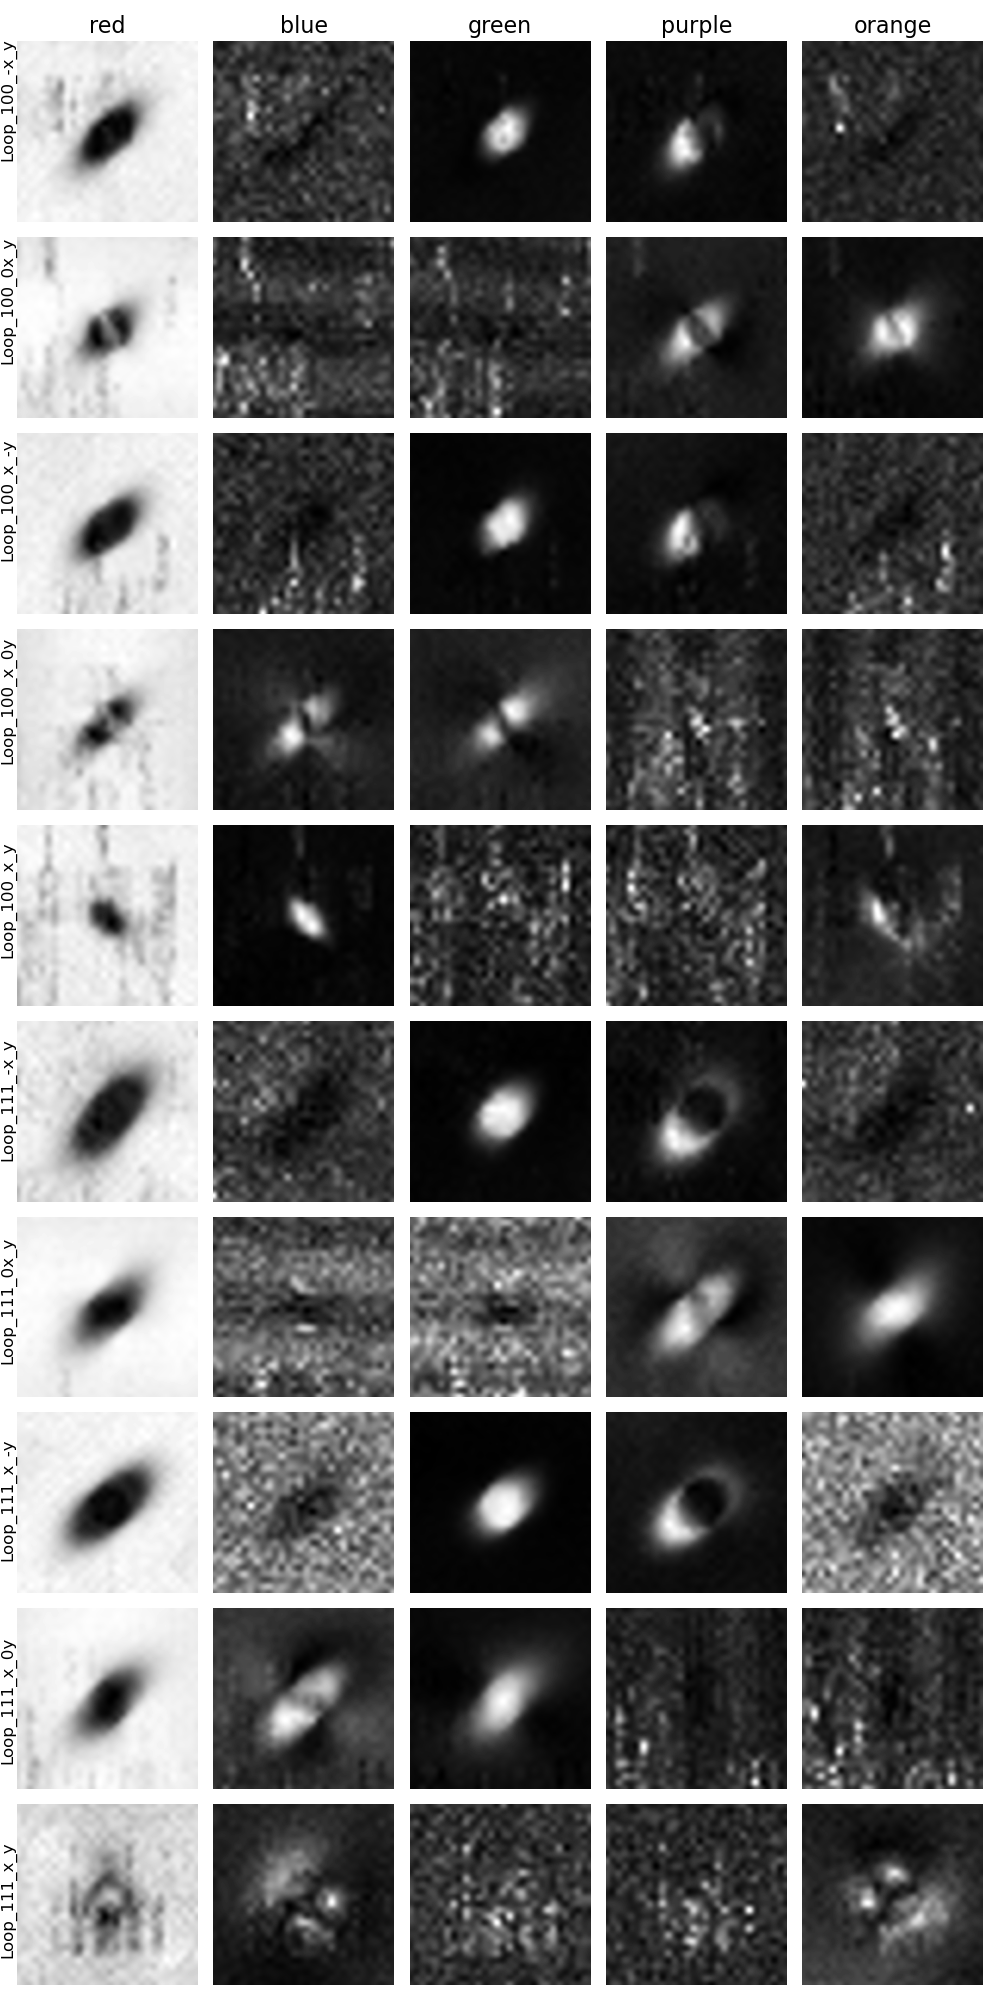

In [16]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
fig, ax = plt.subplots(len(files), 5, figsize=(10, 2*len(files)))

for i, file in enumerate(files):
    data = np.load(path + file)['arr_0']

    data -= data.min()
    norm_data = data / np.sum(data)

    # get mins and maxes for last 4
    norm_min = np.min(norm_data[1:])
    norm_max = np.max(norm_data[1:])

    # Display the normalized slices
    for j in range(5):
        img = zoom(norm_data[j], zoom=3, order=2)
        img -= norm_min
        img /= norm_max

        mean, std = img.mean(), img.std()
        # img*= std

        
        #adjust gamma here
        # gamma = 0.5
        # img = img ** (1/gamma) 

        ax[i, j].imshow(img, cmap='grey')#, vmin=0,vmax=0.21)
        ax[i, j].axis('off')

# label columns with colors and rows with filenames
for j in range(5):
    ax[0, j].set_title(f'{colors[j]}', fontsize=16)
for i, file in enumerate(files):
    ypos = (len(files)-i-0.5) / len(files)   # normalized vertical position
    fig.text(0, ypos, file.split('.')[0],va='center', fontsize=12, rotation=90)
             
fig.tight_layout()

### For one at a time:

(probably easier to save)

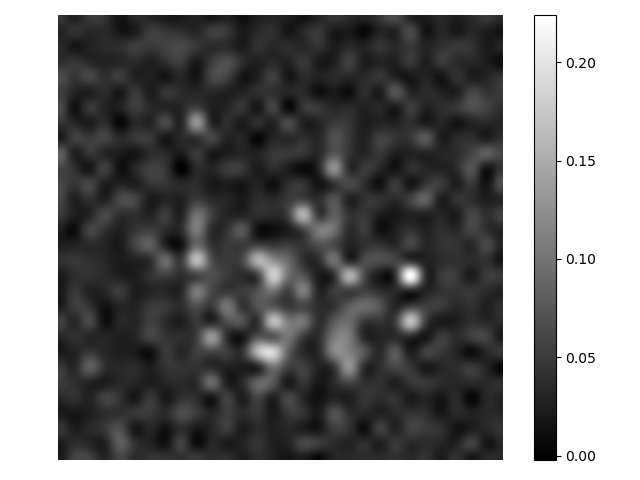

In [23]:
# this is where you chose which image to display
# --------------------------------------------------------
selected_file = files[0] # row
selected_image = 3      # column
# --------------------------------------------------------

# this bit loads and normalizes the data between 0 and 1
data = np.load(path + selected_file)['arr_0']
data -= data.min()
norm_data = data / np.sum(data)
norm_min = np.min(norm_data[1:])
norm_max = np.max(norm_data[1:])
img = norm_data[selected_image]
img = zoom(img, zoom=3, order=2)
img -= norm_min
img /= norm_max

plt.figure(figsize=(10,10))
# this is where you can adjust the max and min values for display
# --------------------------------------------------------
plt.imshow(img, cmap='grey', vmin=0,vmax=1)
# --------------------------------------------------------
# alternatively, the plot should be interactive
# try hovering your mouse over the image - buttons sould appear.
# select the square button.
# click and drag over the colorbar to adjust the contrast
# to reset the image, click the home button
plt.axis('off')
plt.colorbar()
plt.tight_layout()